In [1]:
import os

In [2]:
data_dir = 'C:\\Users\\glori\\Downloads\\cell_images\\cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from matplotlib.image import imread

In [6]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [7]:
test_path

'C:\\Users\\glori\\Downloads\\cell_images\\cell_images\\test\\'

In [8]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [10]:
#Lets take a look at a single image of an infected cell
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
example = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [12]:
example

'C:\\Users\\glori\\Downloads\\cell_images\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

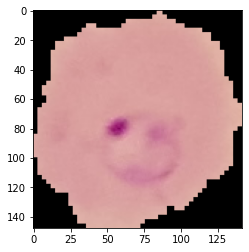

In [13]:
plt.imshow(imread(example))

In [14]:
imread(example).shape

(148, 142, 3)

In [15]:
#Lets take a lok at an unifected cell
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [16]:
example2 = train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [17]:
example2

'C:\\Users\\glori\\Downloads\\cell_images\\cell_images\\train\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

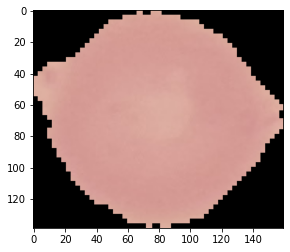

In [18]:
plt.imshow(imread(example2))

In [19]:
imread(example2).shape

(139, 160, 3)

In [20]:
pwd

'C:\\Users\\glori\\Downloads\\FINAL_TF2_FILES\\TF_2_Notebooks_and_Data\\04-CNNs'

In [21]:
len(os.listdir(train_path+'parasitized'))

12480

In [22]:
len(os.listdir(train_path+'uninfected'))

12480

In [23]:
len(os.listdir(test_path+'uninfected'))

1300

In [24]:
len(os.listdir(test_path+'parasitized'))

1300

In [25]:
#Lets check the average dimension of the images because the file contains images of differnt shape
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)


In [26]:
dim1

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


C:\Users\glori\anaconda3\envs\mytfenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


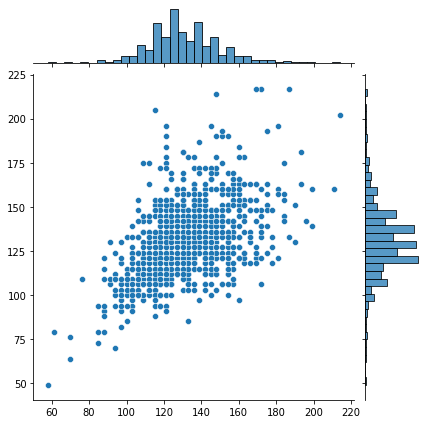

In [27]:
sns.jointplot(dim1,dim2)

In [28]:
np.mean(dim1)

130.92538461538462

In [29]:
np.mean(dim2)

130.75

In [30]:
#since our average dimension is about 130, we will set our image shape to that number
image_shape = (130, 130, 3) # 130 by 130 by 3(colored images)

In [31]:
#Generate batches of tensor image data with real-time data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
imread(example).max()
imread(example2).max()# no need to normalize

0.88235295

In [33]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [34]:
#image genrator gives a varriation of the same image, like artificially expanding your dataset

In [35]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [37]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [40]:
batch_size = 16

In [41]:
#image generator for training set
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [42]:
#image generator for test set
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [43]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [44]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20


C:\Users\glori\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


1560/1560 [==============================] - 157s 100ms/step - loss: 0.3411 - accuracy: 0.8445 - val_loss: 0.2071 - val_accuracy: 0.9227
Epoch 2/20
1560/1560 [==============================] - 162s 104ms/step - loss: 0.1805 - accuracy: 0.9442 - val_loss: 0.1760 - val_accuracy: 0.9423
Epoch 3/20
1560/1560 [==============================] - 164s 105ms/step - loss: 0.1667 - accuracy: 0.9478 - val_loss: 0.1601 - val_accuracy: 0.9469
Epoch 4/20
1560/1560 [==============================] - 159s 102ms/step - loss: 0.1597 - accuracy: 0.9504 - val_loss: 0.1496 - val_accuracy: 0.9527
Epoch 5/20
1560/1560 [==============================] - 153s 98ms/step - loss: 0.1546 - accuracy: 0.9516 - val_loss: 0.1494 - val_accuracy: 0.9504
Epoch 6/20
1560/1560 [==============================] - 152s 98ms/step - loss: 0.1583 - accuracy: 0.9498 - val_loss: 0.1574 - val_accuracy: 0.9473
Epoch 7/20
1560/1560 [==============================] - 153s 98ms/step - loss: 0.1550 - accuracy: 0.9496 - val_loss: 0.1614 -

In [45]:
from tensorflow.keras.models import load_model
model.save('malaria_model.h5')

In [46]:
losses = pd.DataFrame(model.history.history)


<AxesSubplot:>

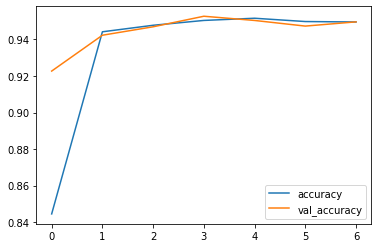

In [71]:
losses[['accuracy','val_accuracy']].plot()

In [48]:
pred = model.evaluate_generator(test_image_gen)

C:\Users\glori\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [49]:
pred

[0.15152841806411743, 0.9530768990516663]

In [50]:
from tensorflow.keras.preprocessing import image

In [51]:
pred_probabilities = model.predict_generator(test_image_gen)

C:\Users\glori\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [52]:
predictions = pred_probabilities > 0.5

In [53]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [56]:
cm =confusion_matrix(test_image_gen.classes,predictions)

In [57]:
print(cm)

[[1223   77]
 [  48 1252]]


<AxesSubplot:>

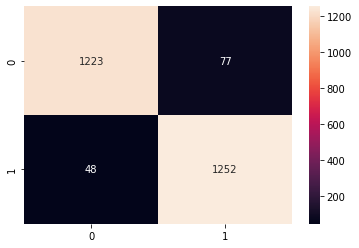

In [58]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g')

<AxesSubplot:>

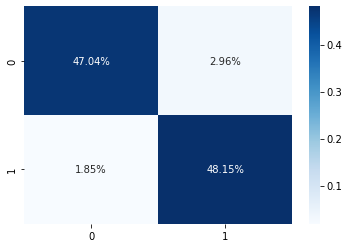

In [59]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [60]:
new_image = image.load_img(example, target_size = image_shape)

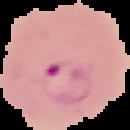

In [61]:
new_image

In [62]:
new_image_arr = image.img_to_array(new_image)

In [63]:
new_image_arr.shape

(130, 130, 3)

In [64]:
#since the model expects images in batches, we have to reshape to make the ist dimension= 1 since it will just be an image
new_image_arr = np.expand_dims(new_image_arr, axis=0)

In [65]:
new_image_arr.shape

(1, 130, 130, 3)

In [66]:
model.predict(new_image_arr)

array([[0.]], dtype=float32)

In [67]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}